# Student Exam Performance Prediction
Fonte: https://www.kaggle.com/datasets/mrsimple07/student-exam-performance-prediction/data


## Dicionário das features

**Study Hours** - Número de horas estudadas pelo aluno antes da prova.

**Previous exam score** - Nota do exame anterior, normalmente entre 0 e 100.

**Pass/Fail** - indica se o aluno passou ou não no exame atual.


# Regressão Logística com três classes


# Objetivos


In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

from IPython import display
from sklearn.model_selection import train_test_split

In [2]:

file_path = "student_exam_data.csv"

df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "mrsimple07/student-exam-performance-prediction",
  file_path,
)

df.head()

Using Colab cache for faster access to the 'student-exam-performance-prediction' dataset.


,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Study Hours          500 non-null    float64
 1   Previous Exam Score  500 non-null    float64
 2   Pass/Fail            500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [4]:
df.describe()

,Study Hours,Previous Exam Score,Pass/Fail
count,500.000000,500.000000,500.000000
mean,5.487055,68.917084,0.368000
std,2.688196,17.129607,0.482744
min,1.045554,40.277921,0.000000
25%,3.171517,53.745955,0.000000
50%,5.618474,68.309294,0.000000
75%,7.805124,83.580209,1.000000
max,9.936683,99.983060,1.000000


In [5]:
df['Pass/Fail'].value_counts()

,count
Pass/Fail,
0,316
1,184


In [6]:
# preparação de x e y
df['Pass/Fail'] = df['Pass/Fail'].astype(int)

X = df[['Study Hours', 'Previous Exam Score']].values
y = df['Pass/Fail'].values

In [7]:
# normalização de dados
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X - X.mean(axis=0)) / X.std(axis=0)

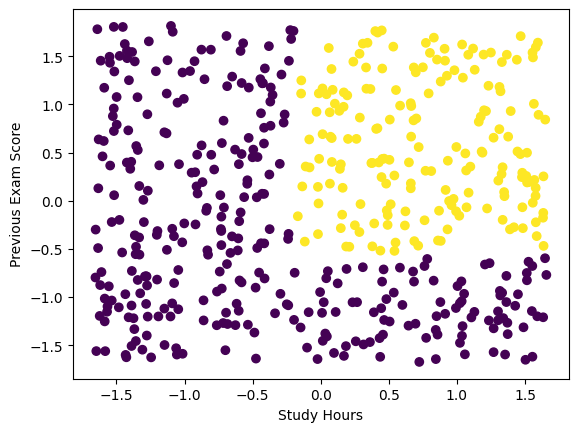

In [8]:
# gráfico para visualização dos dados normalizados
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Study Hours')
plt.ylabel('Previous Exam Score')
plt.show()

## Preparação dos dados com Pytorch

In [9]:
X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).long()

In [10]:
y_tensor

tensor([0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
        1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
        0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
        1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
        0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
        1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
        0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,

# Construindo o modelo de rede

In [11]:
model = nn.Linear(2, 2)

In [12]:
model.state_dict()

OrderedDict([('weight',
              tensor([[-0.4962,  0.2420],
                      [-0.2159,  0.5101]])),
             ('bias', tensor([ 0.6806, -0.6516]))])

Fazendo um predict

In [13]:
out = model(Variable(X_tensor[:4,:]))
out

tensor([[ 1.0703, -0.1751],
        [-0.0254, -0.8819],
        [ 0.1461, -1.1289],
        [ 0.7957, -0.1305]], grad_fn=<AddmmBackward0>)

In [14]:
oo = F.softmax(out, dim=1)
oo

tensor([[0.7765, 0.2235],
        [0.7019, 0.2981],
        [0.7816, 0.2184],
        [0.7163, 0.2837]], grad_fn=<SoftmaxBackward0>)

# Calculando as probabilidades com softmax

In [15]:
F.softmax(out, dim=1)*100

tensor([[77.6511, 22.3489],
        [70.1942, 29.8058],
        [78.1593, 21.8407],
        [71.6312, 28.3688]], grad_fn=<MulBackward0>)

Predição da classe

In [16]:
prob,y_pred = torch.max(F.softmax(out, dim=1), dim=1)
print(prob)
print(y_pred)

tensor([0.7765, 0.7019, 0.7816, 0.7163], grad_fn=<MaxBackward0>)
tensor([0, 0, 0, 0])


Treinamento

Classe para visulização dinâmica

In [17]:
# --- Funções auxiliares ---
def predict(model, inputs):
    outputs = model(inputs)
    _, predicts = torch.max(outputs, dim=1)
    return predicts


def predict_proba(model, inputs):
    outputs = model(inputs)
    predicts = F.softmax(outputs, dim=1)
    return predicts


# --- Classe MyPlotter corrigida ---
class MyPlotter:
    def __init__(self, model, X, y, nb_epoch):
        self.model = model
        self.X = X
        self.y = y
        self.nb_epoch = nb_epoch

        # grade para decisão
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

        self.xx, self.yy = np.meshgrid(
            np.arange(x_min, x_max, 0.1),
            np.arange(y_min, y_max, 0.1)
        )

        self.x_grid = np.stack((self.xx.ravel(), self.yy.ravel()), axis=1)

        # histórico de loss
        self.loss_history = []
        self.val_loss_history = []

        # figuras
        self.fig = plt.figure(figsize=(15, 4), dpi=100)

        self.ax1 = self.fig.add_subplot(1, 3, 1)
        self.ax1.set_title("Loss")

        self.ax2 = self.fig.add_subplot(1, 3, 2)
        self.ax2.set_title("Decision Boundary")
        self.ax2.set_xlabel("Study Hours")
        self.ax2.set_ylabel("Previous Exam Score")

        self.ax3 = self.fig.add_subplot(1, 3, 3)
        self.ax3.set_title("Probabilities")
        self.ax3.set_xlabel("Study Hours")
        self.ax3.set_ylabel("Previous Exam Score")

    # -------------------------------------------
    def on_train_begin(self):
        display.display(self.fig)
        display.clear_output(wait=True)

    # -------------------------------------------
    def on_epoch_end(self, epoch, logs={}):
        self.loss_history.append(logs.get("loss"))
        self.val_loss_history.append(logs.get("val_loss"))

        if epoch % 100 == 0:

            # --- Plot Loss ---
            self.ax1.clear()
            self.ax1.set_title("Loss")
            self.ax1.plot(self.loss_history, "b", linewidth=2)

            # --- Decision Boundary ---
            self.ax2.clear()
            self.ax2.set_title("Decision Boundary")
            X_tensor = torch.tensor(self.x_grid, dtype=torch.float32)

            Zc = predict(self.model, X_tensor).numpy()
            Zc = Zc.reshape(self.xx.shape)

            self.ax2.pcolormesh(self.xx, self.yy, Zc, shading='auto', cmap=plt.cm.Paired)

            colors = np.array(["r", "y", "b"])
            self.ax2.scatter(self.X[:, 0], self.X[:, 1], s=40,
                             c=colors[self.y], edgecolors="k")

            # --- Probabilities ---
            self.ax3.clear()
            self.ax3.set_title("Probabilities")

            Zp = predict_proba(self.model, X_tensor).detach().numpy()
            Zp = Zp[:, 1]  # probabilidade da classe 1 (pode ajustar)
            Zp = Zp.reshape(self.xx.shape)

            self.ax3.pcolormesh(self.xx, self.yy, Zp, shading='auto', cmap=plt.cm.magma)
            self.ax3.scatter(self.X[:, 0], self.X[:, 1], s=40,
                             c=colors[self.y], edgecolors='k')

            display.display(self.fig)
            display.clear_output(wait=True)

Laço principal de treinamento da Regressão Logística por Softmax

In [18]:
lr = 0.15

optimizer = torch.optim.SGD(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

Final loss: 0.2691341042518616


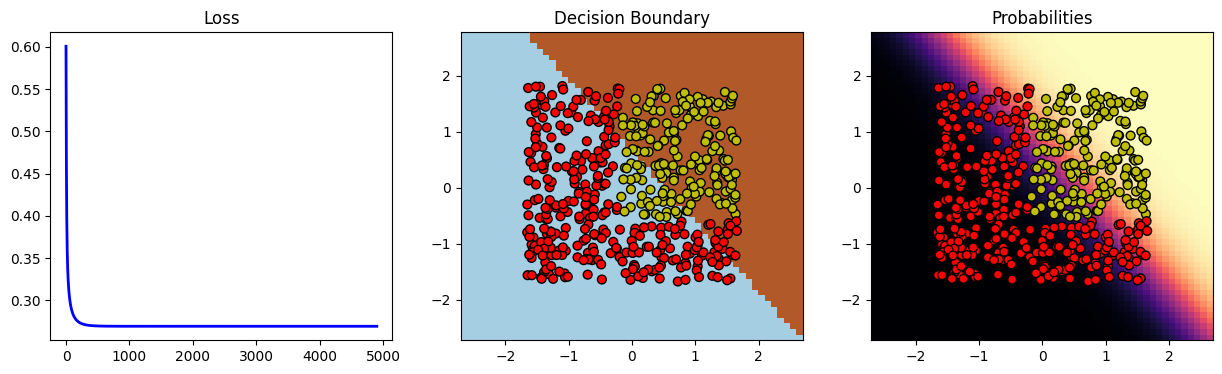

In [19]:
nb_epoch = 5000

#Definindo o plotter
my_plot = MyPlotter(model, X, y, nb_epoch)

losses = []
for i in range(nb_epoch):
    # predict da rede
    output = model(Variable(X_tensor))

    # calcula a perda
    loss = criterion(output, Variable(y_tensor))

    # Faz o backpropagation para calcular os gradientes e otimizar parâmetros
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.data.item())

    my_plot.on_epoch_end(i, {'loss': loss.data.item()});
    final_loss = loss.data.item()

print('Final loss:', final_loss)

## Avaliação

Parâmetros de treinamento

In [20]:
model.state_dict()

OrderedDict([('weight',
              tensor([[-1.8945, -0.8485],
                      [ 1.1823,  1.6006]])),
             ('bias', tensor([ 0.8189, -0.7899]))])

Salavndo os parâmetros treinados

In [21]:
os.makedirs('../models',exist_ok=True)
torch.save(model.state_dict(),'../models/RegrLog_Iris.pt')

In [22]:
! ls ../models/

RegrLog_Iris.pt


In [23]:
nn.init.constant(model.weight,0)
model.state_dict()

/tmp/ipython-input-952960416.py:1: FutureWarning: `nn.init.constant` is now deprecated in favor of `nn.init.constant_`.
  nn.init.constant(model.weight,0)


OrderedDict([('weight',
              tensor([[0., 0.],
                      [0., 0.]])),
             ('bias', tensor([ 0.8189, -0.7899]))])

## Recuperando os dados salvos

In [24]:
param_saved = torch.load('../models/RegrLog_Iris.pt')
model.load_state_dict(param_saved)
model.state_dict()

OrderedDict([('weight',
              tensor([[-1.8945, -0.8485],
                      [ 1.1823,  1.6006]])),
             ('bias', tensor([ 0.8189, -0.7899]))])

## Exatidão (acurácia) do classificador

Acurácia indica o número de acertos sobre o número total de amostras

In [26]:
Y_pred = predict(model, X_tensor)
accuracy = (Y_pred == y_tensor).sum().item() / len(y_tensor)
print(accuracy)

0.868


Matriz de Confusão

In [33]:
# matriz de confusão
import pandas as pd
pd.crosstab(y_tensor, Y_pred)

col_0,0,1
row_0,,
0,284,32
1,34,150


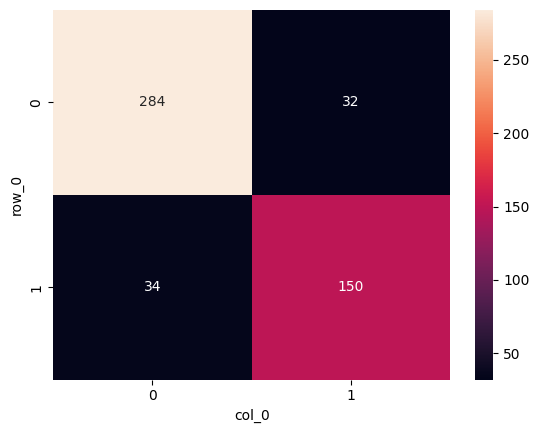

In [37]:
# plotagem matriz de confusão
import seaborn as sns
cm = pd.crosstab(y_tensor, Y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g');

## Métricas de probabilidade

In [39]:
# 1 -
# Forward com todas as amostras
out = model(X_tensor)

# Probabilidades
y_pred_probs = F.softmax(out, dim=1)

# Classes previstas
predicted_classes = torch.argmax(y_pred_probs, dim=1)
y_pred_class = predicted_classes        # tensor (150,)

# Rótulos verdadeiros
Y_tensor = y_tensor                      # tensor (150,)

# Probabilidade máxima por amostra
max_probs, _ = torch.max(y_pred_probs, dim=1)

# Correto/errado
correct = (y_pred_class == Y_tensor)
wrong = ~correct

# Índices solicitados
idx1 = torch.argmax(max_probs[correct])
sample1 = torch.arange(len(max_probs))[correct][idx1]

idx2 = torch.argmax(max_probs[wrong])
sample2 = torch.arange(len(max_probs))[wrong][idx2]

idx3 = torch.argmin(max_probs[correct])
sample3 = torch.arange(len(max_probs))[correct][idx3]

idx4 = torch.argmin(max_probs[wrong])
sample4 = torch.arange(len(max_probs))[wrong][idx4]

print("Correta com maior prob:", sample1.item(), max_probs[sample1].item())
print("Errada  com maior prob:", sample2.item(), max_probs[sample2].item())
print("Correta com menor prob:", sample3.item(), max_probs[sample3].item())
print("Errada  com menor prob:", sample4.item(), max_probs[sample4].item())

Correta com maior prob: 128 0.9999724626541138
Errada  com maior prob: 494 0.9528928995132446
Correta com menor prob: 227 0.5014587640762329
Errada  com menor prob: 367 0.5023779273033142


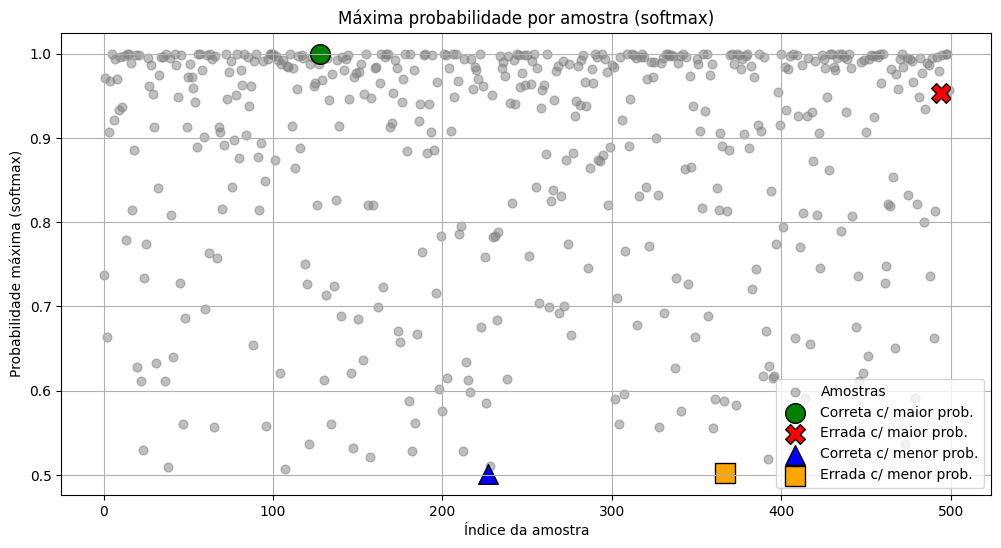

In [40]:
# plotagem gráfico comparativo de máxima probabilidade
plt.figure(figsize=(12,6))

# Plota todas as probabilidades (pontos neutros)
plt.scatter(
    range(len(max_probs)),
    max_probs.detach().numpy(),
    color="gray",
    label="Amostras",
    s=40,
    alpha=0.5
)

# Destacar cada amostra especial

plt.scatter(sample1.item(), max_probs[sample1].item(),
            color="green", s=200, marker="o",
            edgecolor="black", label="Correta c/ maior prob.")

plt.scatter(sample2.item(), max_probs[sample2].item(),
            color="red", s=200, marker="X",
            edgecolor="black", label="Errada c/ maior prob.")

plt.scatter(sample3.item(), max_probs[sample3].item(),
            color="blue", s=200, marker="^",
            edgecolor="black", label="Correta c/ menor prob.")

plt.scatter(sample4.item(), max_probs[sample4].item(),
            color="orange", s=200, marker="s",
            edgecolor="black", label="Errada c/ menor prob.")

plt.title("Máxima probabilidade por amostra (softmax)")
plt.xlabel("Índice da amostra")
plt.ylabel("Probabilidade máxima (softmax)")
plt.grid(True)
plt.legend()
plt.show()